In [0]:
from fastai.text import *
from fastai import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
 path = Path('drive/My Drive/tamil_nlp')
 path.ls()

[PosixPath('drive/My Drive/tamil_nlp/tamil_movie_reviews_test.csv'),
 PosixPath('drive/My Drive/tamil_nlp/tamil_news_test.csv'),
 PosixPath('drive/My Drive/tamil_nlp/tamil_thirukkural_test.csv'),
 PosixPath('drive/My Drive/tamil_nlp/tamil_movie_reviews_train.csv'),
 PosixPath('drive/My Drive/tamil_nlp/tamil_news_train.csv'),
 PosixPath('drive/My Drive/tamil_nlp/tamil_thirukkural_train.csv'),
 PosixPath('drive/My Drive/tamil_nlp/models')]

In [18]:
df=pd.read_csv(path/'tamil_movie_reviews_train.csv')
df.head()

,ReviewId,ReviewInTamil,Rating
0,408,"தமிழ் சினிமாவில் ஒரு சிலர் மட்டுமே பணம், பிஸின...",4.00
1,107,கரு : சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச...,2.00
2,319,தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...,3.25
3,484,உலக அளவில் அனைத்து தரப்பினரையும் தன் நடிப்பால்...,2.25
4,204,"கரு : வில்லனின் கையாள் , வில்லன் செய்த நம்பிக்...",3.00


In [17]:
dft=pd.read_csv(path/'tamil_movie_reviews_test.csv')
dft.head()

,ReviewId,ReviewInTamil,Rating
0,521,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...,2.75
1,266,கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...,2.00
2,127,கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...,2.00
3,528,தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...,2.00
4,260,கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...,2.50


In [24]:
newdf=df.append(dft)
newdf.head()

,ReviewId,ReviewInTamil,Rating
0,408,"தமிழ் சினிமாவில் ஒரு சிலர் மட்டுமே பணம், பிஸின...",4.00
1,107,கரு : சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச...,2.00
2,319,தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...,3.25
3,484,உலக அளவில் அனைத்து தரப்பினரையும் தன் நடிப்பால்...,2.25
4,204,"கரு : வில்லனின் கையாள் , வில்லன் செய்த நம்பிக்...",3.00


In [25]:
len(newdf)

601

1    கரு : சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச...
2    தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...
Name: ReviewInTamil, dtype: object


In [0]:
data=(TextList.from_df(newdf, path=path, cols='ReviewInTamil')
.split_by_rand_pct(0.1)
.label_for_lm()
.databunch(bs=48))

In [0]:
#data=(TextList.from_csv(path,'tamil_movie_reviews_train.csv', cols='ReviewInTamil')
#.split_by_rand_pct(0.1)
#.label_for_lm()
#.databunch(bs=24))

In [30]:
data.show_batch(rows=4)

idx,text
0,"வளரும் அவளுக்கு மிகப்பெரும் ஒரு துன்பம் வர , வீட்டை விட்டு வெளியேறும் சூழ்நிலை xxup xxunk பிறகு இந்த xxunk மீதுள்ள கோபம் , தான் வாழ்க்கையில் xxunk சோகம் என்று அனைத்தையும் சொல்ல ஒரு xxunk வர அங்கு பல அதிர்ச்சிகரமான தகவலை அருவி சொல்ல , அதை தொடர்ந்து நடக்கும் பரபரப்பான சுவாரஸ்யமான , xxunk காட்சிகளே xxup xxunk யாருடா இந்த பெண் ? என்று xxunk புருவம் உயர்த்த வைக்கின்றார். முதல் படம் என்று சத்தியம் செய்தால் கூட யாரும் நம்ப மாட்டார்கள் , அதிதி xxunk தமிழ் சினிமாவிற்கு ரெட்"
1,"... நான் xxunk எனக்கு ஒரு சின்ன இடம் xxunk xxrep 4 . என க்ளைமாக்ஸில் இஷா கேட்டபடி xxunk இணையும் இடம் வரை ... xxunk காட்சியும் அம்மணியின் நடிப்பிற்கு கட்டியம் xxunk ! xxup வாவ்!<newline>பிற நட்சத்திரங்கள் : முரட்டு அரசியல்வாதி அப்துல் xxunk நாசர் , அவரது தம்பியாக சாப்ட் xxunk xxunk xxunk அப்பாவாக தலைவாசல் விஜய் , காதலுக்கு உதவும் போலீஸ் xxunk மனோஜ் xxunk , ஹெட் கான் xxunk சிங்கமுத்து , நாயகரின் தாயாக வனிதா xxunk , xxunk , நாயகியின் xxunk xxunk ராமன்"
2,"xxunk சீட்டோடு xxup xxunk நாயகி , ஷிவதா நாயர் , காதலியாக அறிமுகமாகி வில்லியாக விஸ்வரூபம் xxunk ஒரு கட்டத்தில் ரசிகனுக்கு யூகிக்க முடிந்து விடுகிறது xxunk பாத்திரம் உணர்ந்து செமயாய் கலக்கி உள்ளார் அம்மணி xxup .<newline>பிற நட்சத்திரங்கள் : கதைக்கு தேவையான இடத்தில் xxunk கச்சிதமாக வரும் பாலசரவணன் .,அவரது நடிப்பிலும் , காமெடியிலும் எப்போதும் xxup xxunk : xxunk xxunk xxunk xxup xxunk ... என்பது கூடுதல் xxup xxunk இசையில் பாடல்கள் xxunk இனிமையாக உள்ளது. படத்தின் பின்னணி இசை , மிரட்டல் என்பது படத்திற்கு பெரும் xxup"
3,"மட்டும் உயிரோடு இருப்பதை ஒரு வழியாக கண்டுபிடிக்கும் அவன் . , தங்கையின் xxunk காதலிலும் xxunk கூடவே , தனது xxunk தன் கொள்ளும் xxunk xxunk xxunk , தந்தை xxunk , தன் காதலிலும் xxunk ? அல்லது அவனது xxunk xxunk தந்தை ஜெயித்தாரா ... ? என்பது தான் ' பிரகாமியம் ' படத்தின் xxup மொத்தக்கதையும்.<newline>காட்சிப்படுத்தல் : xxunk xxunk புரடக்ஷன்ஸ் xxunk தயாரித்து வழங்கிட , xxunk புரொடக்ஷன்ஸ் டி. xxunk வெளியிட , புதியவர் பிரதாப் எழுதி , இயக்கி கதாநாயகராக இரட்டை வேடத்தில் xxunk திரைப்படமான"


In [0]:
learn=language_model_learner(data, AWD_LSTM, drop_mult=0.5)

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


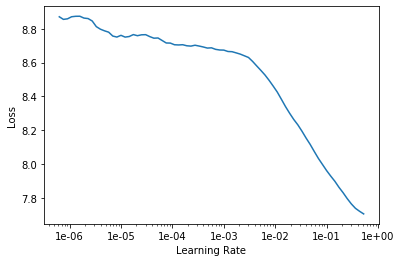

In [33]:
learn.recorder.plot(skip_end=15)

In [34]:
learn.fit_one_cycle(1, max_lr=slice(1e-01), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.351109,5.455744,0.266766,00:06


In [48]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


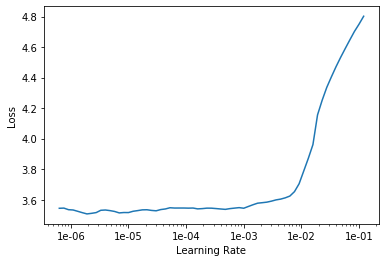

In [49]:
learn.recorder.plot(skip_end=20)

In [0]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(7, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.267777,5.312290,0.274239,00:08
1,5.058213,5.172463,0.284259,00:08
2,4.751299,5.061772,0.294213,00:08
3,4.391202,4.953507,0.299405,00:08
4,4.043749,4.873425,0.311541,00:08
5,3.773967,4.866093,0.314782,00:08
6,3.613622,4.858796,0.316865,00:08


'வணக்கம் சில காட்சிகளை , புலியை வைத்து எதிர்ப்பார்ப்பை எடுத்து வெற்றி போய் அர்ஜூன் நடிப்பில் செம்ம ஹிட் அடிக்க ,'

In [0]:
learn.save('stage1')

In [50]:
learn.fit_one_cycle(3, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.626932,4.892636,0.317064,00:08
1,3.483848,4.786450,0.329630,00:08
2,3.201132,4.770841,0.332738,00:08


In [0]:
learn.save('stage2')

In [52]:
learn.fit_one_cycle(3, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.188309,4.721126,0.330523,00:08
1,3.050746,4.691068,0.347619,00:08
2,2.780052,4.710779,0.350595,00:08


In [0]:
learn.save('stage3')

In [54]:
learn.fit_one_cycle(4, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.692068,4.696787,0.359160,00:08
1,2.685624,4.661959,0.367526,00:08
2,2.476829,4.639578,0.371164,00:08
3,2.253867,4.669837,0.372983,00:08


In [0]:
learn.save('stage4')

In [56]:
learn.fit_one_cycle(4, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.180920,4.684168,0.370304,00:08
1,2.226647,4.622494,0.383565,00:08
2,2.058467,4.631461,0.392460,00:08
3,1.844154,4.680855,0.392493,00:08


In [0]:
learn.save('stage5')

In [58]:
learn.fit_one_cycle(4, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.776482,4.669980,0.394742,00:08
1,1.842332,4.649164,0.397355,00:08
2,1.667160,4.689884,0.403241,00:08
3,1.499535,4.713837,0.405489,00:08


In [0]:
learn.save('stage6')

In [60]:
learn.fit_one_cycle(4, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.442379,4.734875,0.404001,00:08
1,1.520597,4.711864,0.411276,00:08
2,1.374615,4.763308,0.409491,00:08
3,1.204392,4.786272,0.412599,00:08


In [0]:
learn.save('stage7')

In [62]:
learn.fit_one_cycle(4, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.223062,4.781228,0.410185,00:08
1,1.266787,4.788574,0.416303,00:08
2,1.135352,4.841358,0.417427,00:08
3,0.985895,4.864953,0.417097,00:08


In [0]:
learn.save('stage8')

In [0]:
learn.load('stage8');

In [66]:
TEXT= "தமிழ் சினிமாவில்"
N_WORDS = 15
learn.predict(TEXT, N_WORDS, temperature=0.75)

'தமிழ் சினிமாவில் எத்தனையோ படங்கள் எடுக்கப்படுகிறது. பிரபலங்களின் படங்களுக்கு நடுவே சில சிறு பட்ஜெட் படங்கள் அதில் ஒன்று தான் இந்த முன்னோடி'

In [0]:
learn.export('tamil_lang.pkl')